In [1]:
#Choose CMIP Models bsed on ENSO diversity

In [2]:
#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index

In [3]:
import xarray
import numpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [4]:
from eofs.xarray import Eof



In [5]:
%run utils/ecIndex.ipynb

Define a function to use for plotting enso sea area


In [6]:
def ensoPlotter(da, ax):
    import cartopy.feature as cfeature
    import matplotlib.pyplot as plt 
    
    cs=plt.contourf(da.lon, da.lat, da.values,  
                    transform=ccrs.PlateCarree(), 
                   center=True)

    gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle=':')
    ax.coastlines(color='black')
    gl.top_labels=False
    #gl.left_labels=False

        #bottom legend
    cbar=plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.05)

For all models, calculate the alpha, and plot eof 1 and 2. The alpha is based on monthly eof1/2 for Dec-Jan-Feb only

I am not really sure what we expect eof 1 and 2 should look like. Its different to E/C events

In [7]:
modelSet=_model.scenarioMip

['CSIRO-ARCCSS' 'ACCESS-CM2' 'r1i1p1f1' 'r1i1p1f1']


/home/steketea/anaconda3/envs/testEnv/lib/python3.9/site-packages/xarray/core/indexing.py:1381: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


0.2592542706799253


/home/steketea/anaconda3/envs/testEnv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'center'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


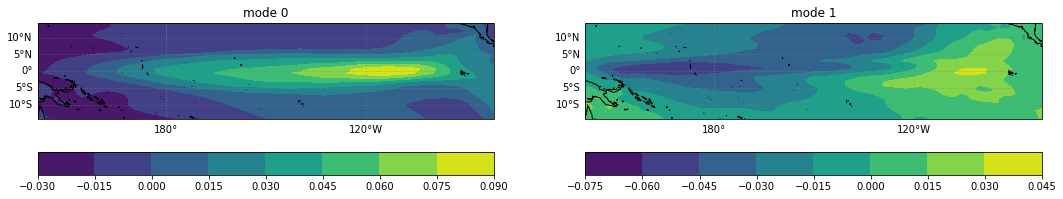

['CSIRO' 'ACCESS-ESM1-5' 'r1i1p1f1' 'r1i1p1f1']


/home/steketea/anaconda3/envs/testEnv/lib/python3.9/site-packages/xarray/core/indexing.py:1381: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


-0.13055359480171497


/home/steketea/anaconda3/envs/testEnv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'center'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


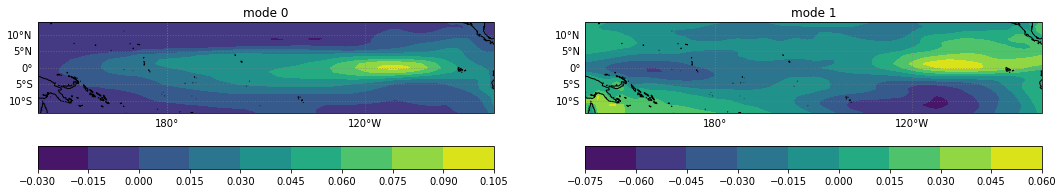

['AWI' 'AWI-CM-1-1-MR' 'r1i1p1f1' 'r1i1p1f1']


In [ ]:
eofList = list()

for iModel in modelSet:
    
        print(iModel)
        eofSolver=solverDCF(iModel)

        indeces = ecIndex(eofSolver)
        indeces['model']=iModel[1]

        print(indeces.alpha.values)

        eofList.append(indeces)

        eofsXr=eofSolver.eofs(neofs=2)

        fig=plt.figure(figsize=(18,12))

        for mode in [0,1]:
            ax=fig.add_subplot(1,2,mode+1,
                           projection=ccrs.Miller(central_longitude=210))

            ensoPlotter(eofsXr.sel(mode=mode), ax)

            plt.title("mode " + str(mode))

        plt.show()


Models can be chosen on some criteria

alpha < -0.15 looks appropriate from Cai et al 2018, however as the methodology doesn't match exactly, this is probably not right and should be calculated from observations.